In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/Housing.xls')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.replace({'yes':1,'no':0},inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
df.replace({'furnished':2,'semi-furnished':1,'unfurnished':0},inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


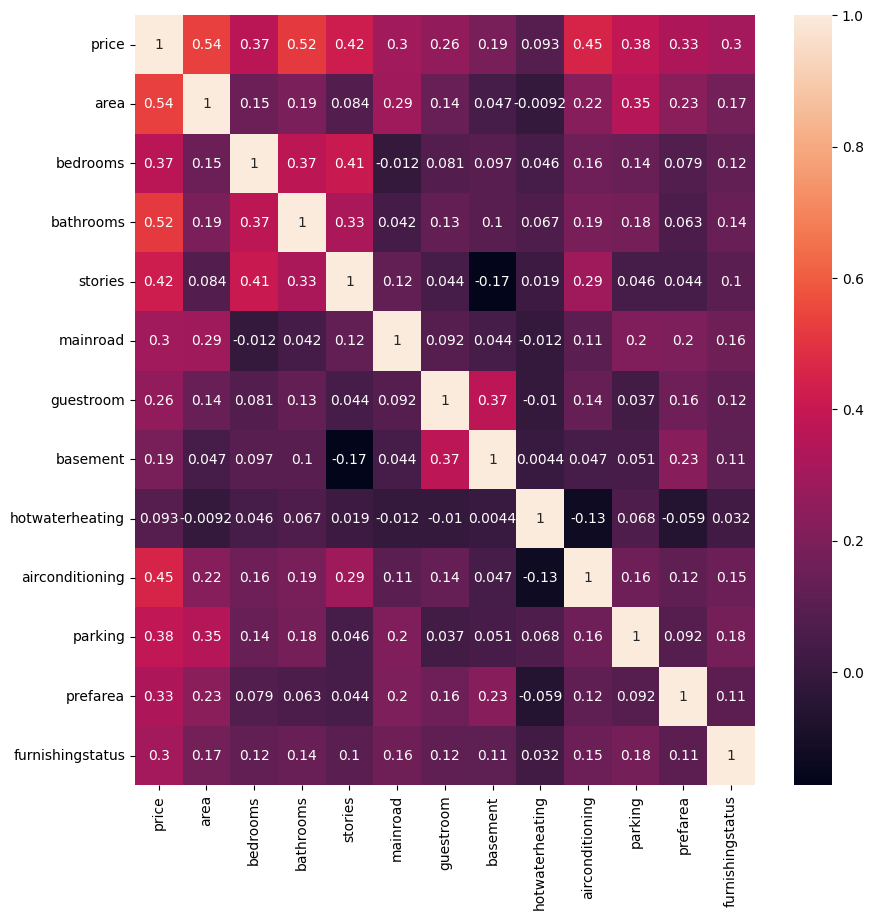

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.drop(['hotwaterheating','basement','guestroom'],axis=1,inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,1,2,1,2
1,12250000,8960,4,4,4,1,1,3,0,2
2,12250000,9960,3,2,2,1,0,2,1,1
3,12215000,7500,4,2,2,1,1,3,1,2
4,11410000,7420,4,1,2,1,1,2,0,2


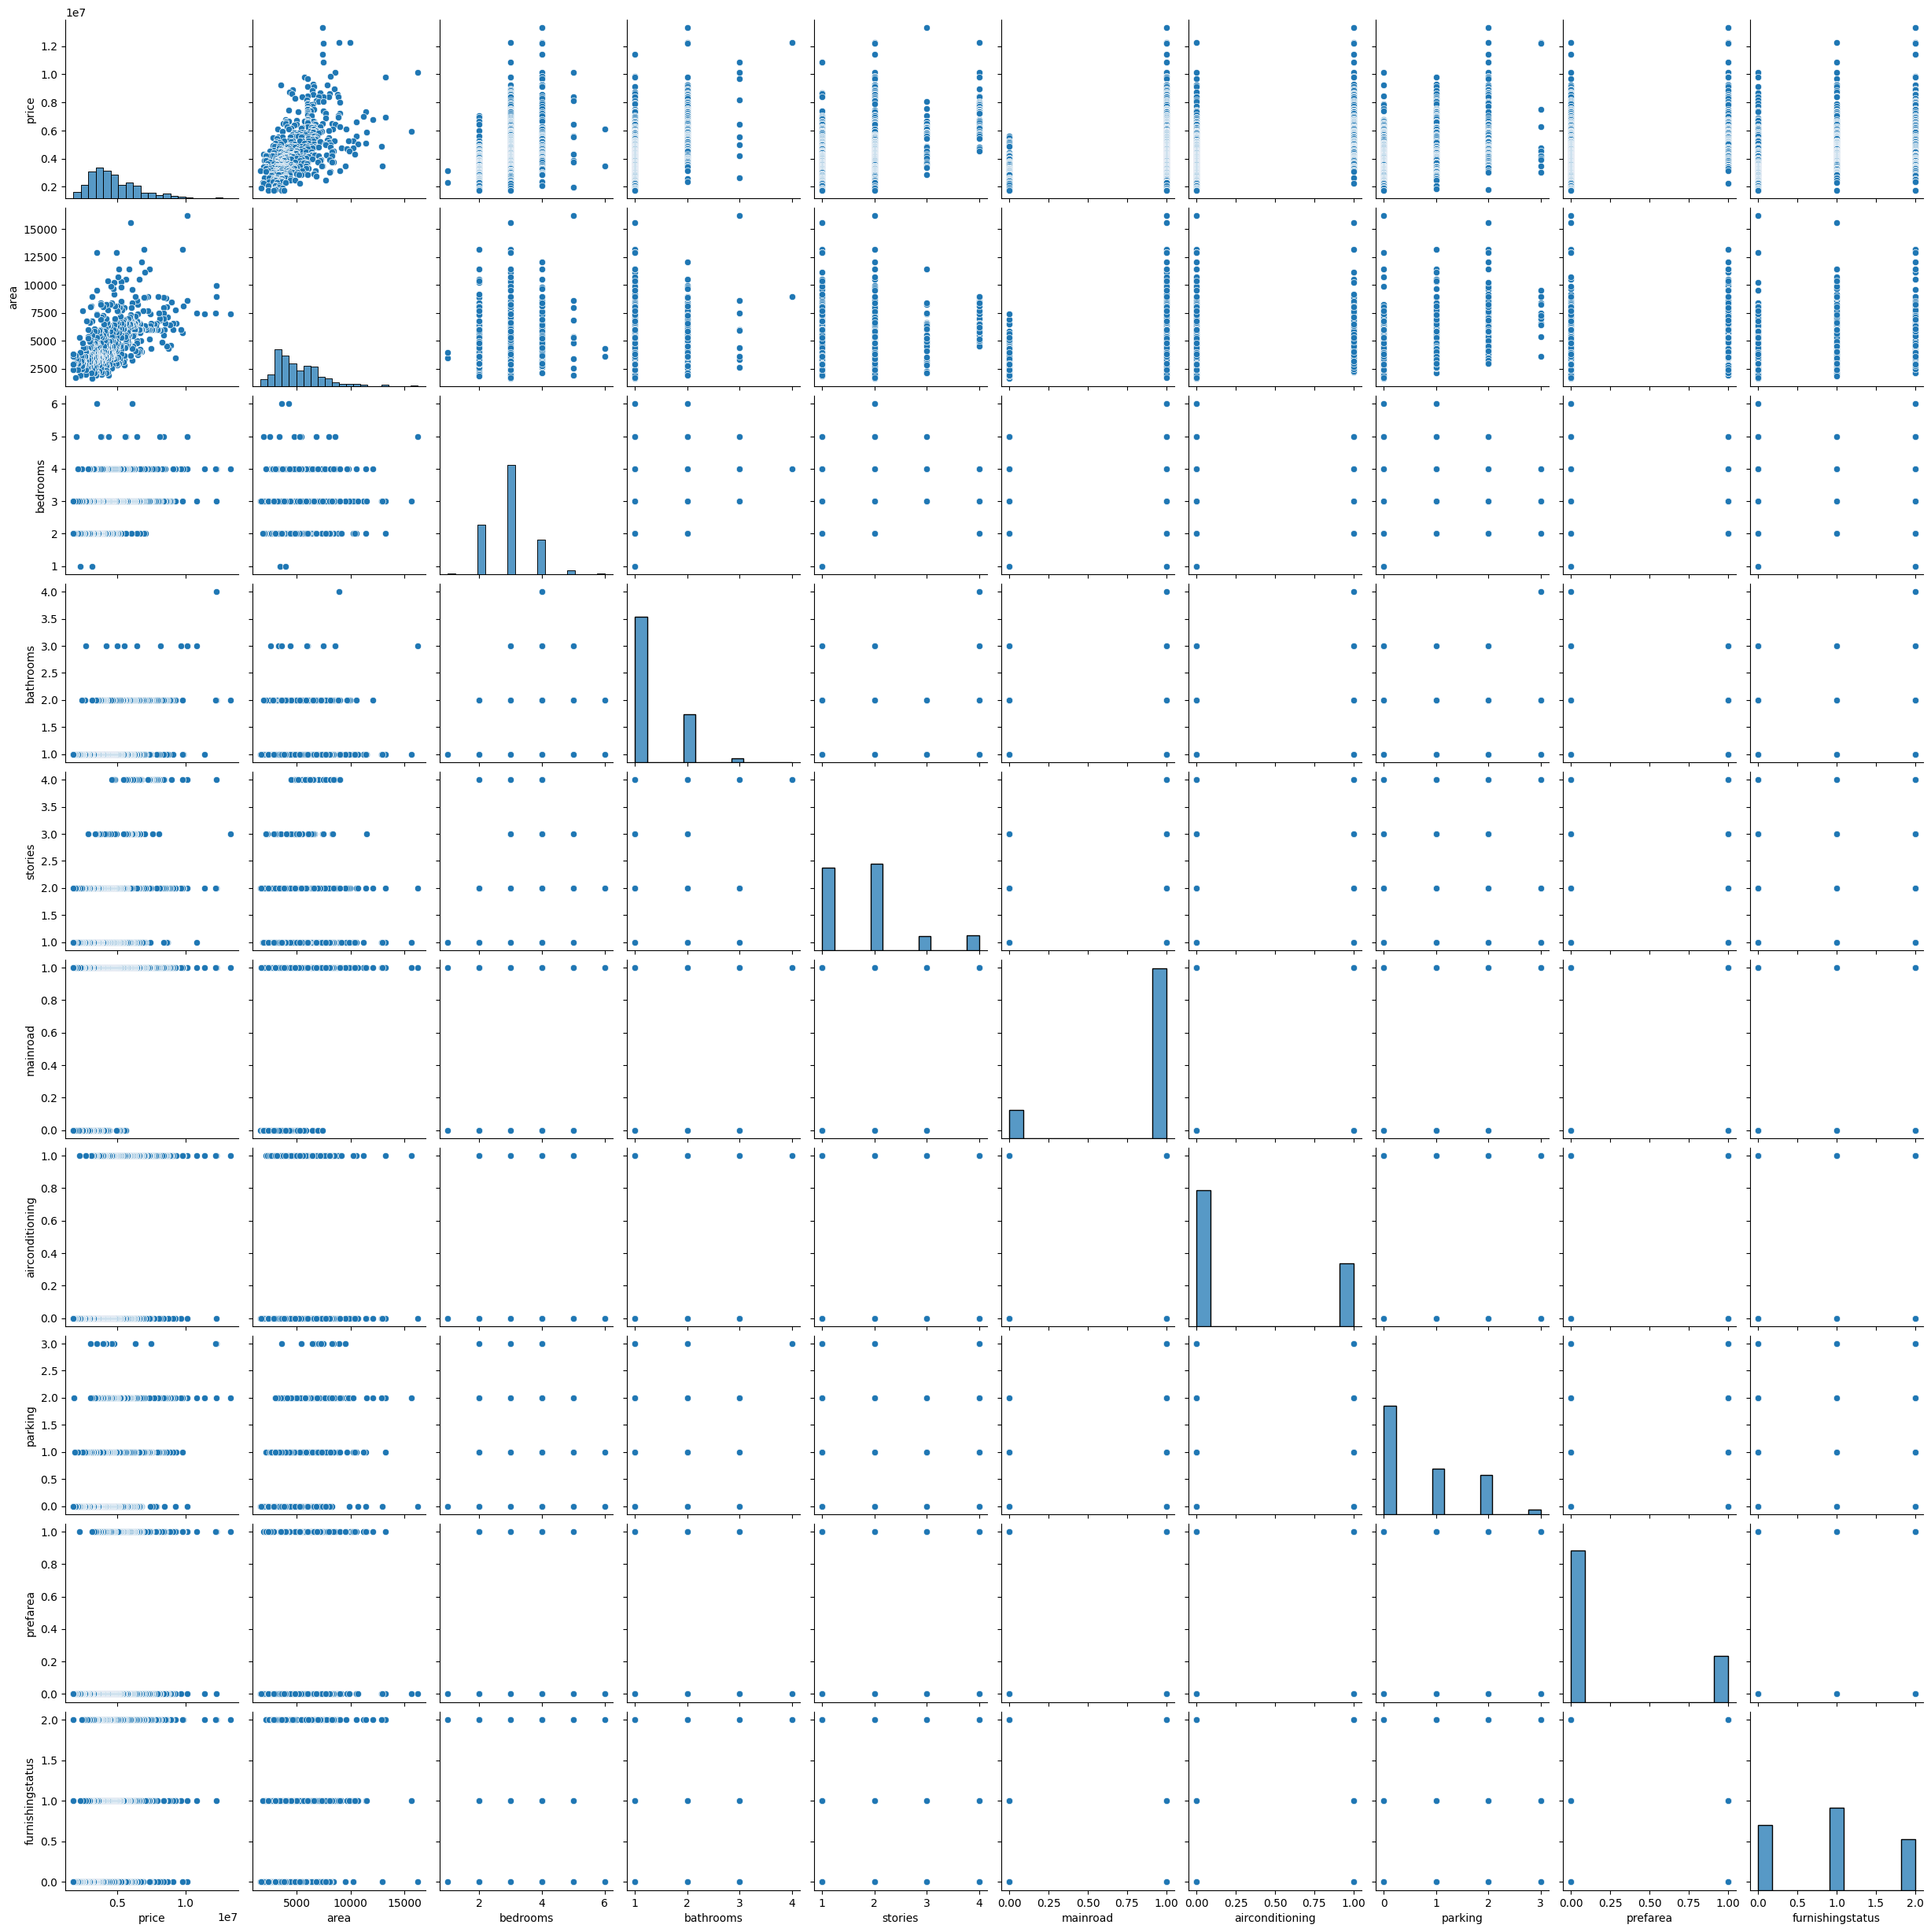

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
x=df.drop('price',axis=1)
y=df['price']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.025,random_state=42)

In [32]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((531, 9), (14, 9), (531,), (14,))

In [33]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [34]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error as mae

In [37]:
print("Testing ",model.score(x_test,y_test))
print("Training ",model.score(x_train,y_train))
print("Mean absolute error",mae(y_test,y_pred))


Testing  0.8047643950254133
Training  0.6516997739543116
Mean absolute error 713456.7601456466


In [38]:
from xgboost import XGBRegressor
k=XGBRegressor()
k.fit(x_train,y_train)
y_pre=k.predict(x_test)
print("Testing ",model.score(x_test,y_test))
print("Training ",model.score(x_train,y_train))
print("Mean absolute error",mae(y_test,y_pre))


Testing  0.8047643950254133
Training  0.6516997739543116
Mean absolute error 715986.4375


In [51]:
y_pred=pd.DataFrame(y_pred)
y_test=pd.DataFrame(y_test)

In [52]:
y_pred.head()

,0
0,5.008881e+06
1,7.635105e+06
2,3.149390e+06
3,4.763983e+06
4,3.560668e+06


In [53]:
y_test.head()

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000


In [54]:
from sklearn.metrics import r2_score  ,mean_absolute_percentage_error
print("R2 score",r2_score(y_test,y_pred))
print("Mean absolute percentage error",mean_absolute_percentage_error(y_test,y_pred))

R2 score 0.8047643950254133
Mean absolute percentage error 0.16135991025532512
